# Modeling Google Mobility Data due to COVID-19 in 2020

In [1]:
import pandas as pd, plotly.express as px, statsmodels.api as sm, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
us_mobil_2020 = pd.read_csv('data/2020_US_Region_Mobility_Report.csv')

In [3]:
us_mobil_2020.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [4]:
region_placeID = us_mobil_2020.loc[:,["sub_region_1","place_id"]].copy()
changes = us_mobil_2020.loc[:,"retail_and_recreation_percent_change_from_baseline":"residential_percent_change_from_baseline"].copy()
mobil_sub = pd.concat((region_placeID, changes), axis = 1)
mobil_sub.head()

,sub_region_1,place_id,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2.0,0.0,8.0,1.0,1.0,0.0


In [5]:
mobil_sub.columns = [col_name.replace("_percent_change_from_baseline", "") for col_name in mobil_sub.columns]
mobil_sub

,sub_region_1,place_id,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
812060,Wyoming,ChIJd4Rqhed3YocR7ubT5-HgoJg,NaN,NaN,NaN,NaN,-56.0,NaN
812061,Wyoming,ChIJd4Rqhed3YocR7ubT5-HgoJg,NaN,NaN,NaN,NaN,-40.0,NaN
812062,Wyoming,ChIJd4Rqhed3YocR7ubT5-HgoJg,NaN,NaN,NaN,NaN,-43.0,NaN
812063,Wyoming,ChIJd4Rqhed3YocR7ubT5-HgoJg,NaN,NaN,NaN,NaN,-40.0,NaN


In [6]:
mobil_2020_tidy = pd.melt(mobil_sub, 
                                id_vars = ["sub_region_1", "place_id"],
                                var_name = "place",
                                value_name = "percent_change_from_baseline")
mobil_2020_tidy

,sub_region_1,place_id,place,percent_change_from_baseline
0,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,retail_and_recreation,6.0
1,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,retail_and_recreation,7.0
2,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,retail_and_recreation,6.0
3,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,retail_and_recreation,0.0
4,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,retail_and_recreation,2.0
...,...,...,...,...
4872385,Wyoming,ChIJd4Rqhed3YocR7ubT5-HgoJg,residential,NaN
4872386,Wyoming,ChIJd4Rqhed3YocR7ubT5-HgoJg,residential,NaN
4872387,Wyoming,ChIJd4Rqhed3YocR7ubT5-HgoJg,residential,NaN
4872388,Wyoming,ChIJd4Rqhed3YocR7ubT5-HgoJg,residential,NaN


In [7]:
formula = "percent_change_from_baseline ~ sub_region_1 + place"
model = sm.OLS.from_formula(formula = formula,
                            data = mobil_2020_tidy)
results = model.fit()

In [8]:
predict_results = results.get_prediction()
result_frame = predict_results.summary_frame()
print(result_frame)

              mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
321      -8.964392  0.093604      -9.147852      -8.780933    -53.930294   
322      -8.964392  0.093604      -9.147852      -8.780933    -53.930294   
323      -8.964392  0.093604      -9.147852      -8.780933    -53.930294   
324      -8.964392  0.093604      -9.147852      -8.780933    -53.930294   
325      -8.964392  0.093604      -9.147852      -8.780933    -53.930294   
...            ...       ...            ...            ...           ...   
4871954  14.217973  0.175799      13.873412      14.562533    -30.748875   
4871957  14.217973  0.175799      13.873412      14.562533    -30.748875   
4871958  14.217973  0.175799      13.873412      14.562533    -30.748875   
4871959  14.217973  0.175799      13.873412      14.562533    -30.748875   
4871960  14.217973  0.175799      13.873412      14.562533    -30.748875   

         obs_ci_upper  
321         36.001509  
322         36.001509  
323         36.

In [9]:
result_frame.insert(0, "state", mobil_2020_tidy["sub_region_1"].copy())
result_frame.insert(1, "place", mobil_2020_tidy["place"].copy())

In [10]:
result_frame

,state,place,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
321,Alabama,retail_and_recreation,-8.964392,0.093604,-9.147852,-8.780933,-53.930294,36.001509
322,Alabama,retail_and_recreation,-8.964392,0.093604,-9.147852,-8.780933,-53.930294,36.001509
323,Alabama,retail_and_recreation,-8.964392,0.093604,-9.147852,-8.780933,-53.930294,36.001509
324,Alabama,retail_and_recreation,-8.964392,0.093604,-9.147852,-8.780933,-53.930294,36.001509
325,Alabama,retail_and_recreation,-8.964392,0.093604,-9.147852,-8.780933,-53.930294,36.001509
...,...,...,...,...,...,...,...,...
4871954,Wyoming,residential,14.217973,0.175799,13.873412,14.562533,-30.748875,59.184820
4871957,Wyoming,residential,14.217973,0.175799,13.873412,14.562533,-30.748875,59.184820
4871958,Wyoming,residential,14.217973,0.175799,13.873412,14.562533,-30.748875,59.184820
4871959,Wyoming,residential,14.217973,0.175799,13.873412,14.562533,-30.748875,59.184820


In [11]:
result_frame.dropna(subset = "state", inplace = True)
result_frame = result_frame.groupby(['state', 'place']).mean()
result_frame.reset_index(level = ["state", "place"], inplace = True)
result_frame['place'] = [place.replace("_", " ") for place in result_frame['place']]
result_frame

,state,place,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,Alabama,grocery and pharmacy,2.325717,0.093900,2.141676,2.509757,-42.640187,47.291621
1,Alabama,parks,31.213234,0.103137,31.011089,31.415378,-13.752748,76.179216
2,Alabama,residential,8.695328,0.094897,8.509332,8.881324,-36.270584,53.661240
3,Alabama,retail and recreation,-8.964392,0.093604,-9.147852,-8.780933,-53.930294,36.001509
4,Alabama,transit stations,-10.726891,0.097719,-10.918417,-10.535366,-55.692827,34.239044
...,...,...,...,...,...,...,...,...
301,Wyoming,parks,36.735878,0.180231,36.382632,37.089125,-8.231037,81.702793
302,Wyoming,residential,14.217973,0.175799,13.873412,14.562533,-30.748875,59.184820
303,Wyoming,retail and recreation,-3.441748,0.174893,-3.784532,-3.098963,-48.408582,41.525086
304,Wyoming,transit stations,-5.204247,0.176662,-5.550498,-4.857996,-50.171107,39.762613


In [12]:
sm.stats.anova_lm(results, typ = "I")

,df,sum_sq,mean_sq,F,PR(>F)
sub_region_1,50.0,3.261192e+07,6.522385e+05,1239.206233,0.0
place,5.0,6.169537e+08,1.233907e+08,234433.531397,0.0
Residual,2754548.0,1.449817e+09,5.263357e+02,NaN,NaN


[Text(0.5, 1.0, 'Mobility Change in the United States\nacross place types, pre-pandemic baseline'),
 Text(0.5, 0, 'average mobility change from pre-pandemic baseline')]

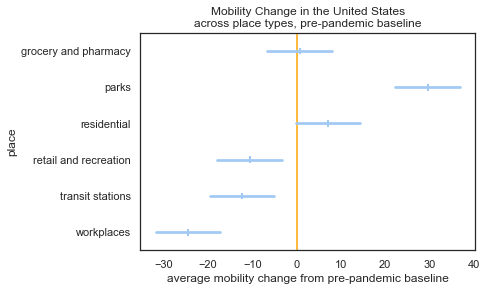

In [13]:
sns.set_theme(style="white")
sns.set_palette('pastel', n_colors = len(result_frame))

# create plot
# set figure size and set padding around subplots to "tight" 
# (to make sure labs are included)
# plt.figure(figsize=[6, 5])
plt.tight_layout()

# add vertical line at 0 (baseline)
plt.axvline(x = 0, color = "orange")

# add place errorbars
ax = sns.pointplot(y = "place", 
                x= "mean", 
                orient = "h",
                ci = 'sd',
                data = result_frame,
                join = False,
                markers = "|")

# set axis labels
ax.set(title = "Mobility Change in the United States\nacross place types, pre-pandemic baseline",
        xlabel = "average mobility change from pre-pandemic baseline")

In [14]:
ave_mobil_by_state = result_frame.groupby(['state']).mean()
ave_mobil_by_state.reset_index(level = ["state"], inplace = True)

# read state codes to create chloropleth
state_codes_df = pd.read_csv('https://raw.githubusercontent.com/jackparmer/iso-3166-state-codes/master/codes.csv')
# state_codes_df.to_csv("data/state_codes.csv")
state_codes_df['state'] = [state_code.strip() for state_code in state_codes_df['state']]

# create map
fig = px.choropleth(ave_mobil_by_state,
                    locations = [state_codes_df.loc[state_codes_df['state'].eq(state).idxmax(), "code"]
                                for state in ave_mobil_by_state.state], 
                    locationmode="USA-states", 
                    color='mean',
                    color_continuous_scale="Earth",
                    # color_continuous_midpoint = 0,
                    range_color = [-30, 10],
                    scope="usa",
                    title = "Mobility Change in the United States, across states",
                    width = 630,
                    height = 450)
fig.show()

![chloropleth map](chloropleth_example.png)

[Text(0.5, 1.0, 'Mobility Change in the United States\nacross states, pre-pandemic baseline at 0'),
 Text(0.5, 0, 'average mobility change from pre-pandemic baseline')]

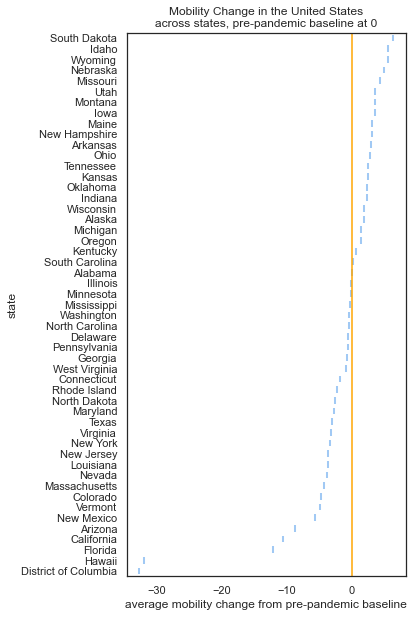

In [15]:
ave_mobil_by_state.sort_values(by = "mean", ascending = False, inplace = True)

sns.set_theme(style="white")
sns.set_palette('pastel')

# create plot
# set figure size and set padding around subplots to "tight" 
# (to make sure labs are included)
plt.figure(figsize=[5, 10])
plt.tight_layout()

# add vertical line at 0 (baseline)
plt.axvline(x = 0, color = "orange")

# add place errorbars
ax = sns.pointplot(y = "state", 
                x= "mean", 
                orient = "h",
                data = ave_mobil_by_state,
                join = False,
                markers = "|")

# set axis labels
ax.set(title = "Mobility Change in the United States\nacross states, pre-pandemic baseline at 0",
        xlabel = "average mobility change from pre-pandemic baseline")